In [1]:
import pysam
import numpy as np
import cPickle as pickle
%load_ext autoreload
%autoreload 2
%matplotlib inline
from collections import Counter
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)
from operator import itemgetter
import pandas as pd
from itertools import islice

In [13]:
samples = ['AAAGTT']#, 'ATATAG', 'ATCAAA', 'CCCTGG', 'CCGGAC', 'GACCGC', 'GGCGTC', 'GTTCGA', 'TAAAGT', 'TCTGCA', 'TTAATC']

In [86]:
sample = 'AAAGTT'

In [87]:
in_file = '/data/UMI/data/MUS/sample_' + sample + '.bam'
st = pysam.AlignmentFile(in_file,"rb")

In [15]:
def group_by_umi_df(pysam_iter):
    
    pysam_iter.reset()
    reads = pysam_iter.fetch(until_eof=True)
    
    g = []
    
    for r in reads:
        if not r.is_unmapped:
            g.append((r.get_tag('XM'), r.get_tag('XM') + ':' + r.query_sequence))
            
    d1 = pd.DataFrame(g, columns=['XM','XS'])
    d2 = d1.drop_duplicates(subset=['XS'])
    d3 = d2.groupby('XM')['XS']
    d4 = d1.groupby('XM')['XS']
    
    return d3, d4

In [35]:
a, b = group_by_umi_df(st)

In [37]:
x = [len(j) for i,j in a]
y = [len(j) for i,j in b]

In [40]:
Counter(y)

Counter({1: 13278,
         2: 12097,
         3: 10478,
         4: 11522,
         5: 9599,
         6: 11120,
         7: 8518,
         8: 9335,
         9: 7661,
         10: 7687,
         11: 5620,
         12: 7377,
         13: 4507,
         14: 5165,
         15: 4380,
         16: 4676,
         17: 3116,
         18: 4270,
         19: 2630,
         20: 3580,
         21: 2713,
         22: 2592,
         23: 1770,
         24: 3092,
         25: 1666,
         26: 1756,
         27: 1665,
         28: 1991,
         29: 1124,
         30: 1935,
         31: 999,
         32: 1466,
         33: 1136,
         34: 1011,
         35: 1061,
         36: 1501,
         37: 755,
         38: 789,
         39: 770,
         40: 1192,
         41: 607,
         42: 1090,
         43: 536,
         44: 776,
         45: 784,
         46: 610,
         47: 468,
         48: 968,
         49: 618,
         50: 630,
         51: 482,
         52: 560,
         53: 351,
         54: 

In [4]:
def preprocess_bar_data(counter):
    
    x = [i for i,j in counter.items()]
    y = [j for i,j in counter.items()]
    
    return x, y

In [19]:
def umi_dist_report(pysam_iter):
    
    umi_df, umi_df_dup = group_by_umi_df(pysam_iter)
    
    d1 = []
    for name, group in umi_df:
        d1.append((name, len(group)))
    
    x1, y1 = preprocess_bar_data(Counter(dict(d1).values()))
    
    d2 = []
    for name, group in umi_df_dup:
        d2.append((name, len(group)))
    
    x2, y2 = preprocess_bar_data(Counter(dict(d2).values()))
        
    return x1, y1, x2, y2

In [6]:
%%time
bar_plot_data = []

for sample in samples:
    in_file = '/data/UMI/data/MUS/sample_' + sample + '.bam'
    st = pysam.AlignmentFile(in_file,"rb")
    
    x, y, _, _ = umi_dist_report(st)
    bar_plot_data.append((sample, x, y))

CPU times: user 7min 57s, sys: 11.8 s, total: 8min 9s
Wall time: 8min 10s


In [20]:
%%time
bar_plot_dupdata = []

for sample in samples:
    in_file = '/data/UMI/data/MUS/sample_' + sample + '.bam'
    st = pysam.AlignmentFile(in_file,"rb")
    
    _, _, x, y = umi_dist_report(st)
    bar_plot_dupdata.append((sample, x, y))

CPU times: user 27.6 s, sys: 215 ms, total: 27.9 s
Wall time: 27.9 s


In [7]:
pickle.dump(bar_plot_data, open('umi_dist_data.pkl','wb'), protocol=pickle.HIGHEST_PROTOCOL)

In [8]:
from itertools import cycle

In [9]:
def plot_bars(bar_plot_data):
    
    colors = cycle(['r','g','b'])
    
    fig = plt.figure(figsize=(10,80))
    fig.suptitle('Unique Molecular Identifier distribution per single cell', fontsize=13, fontweight='bold')

    number_of_subplots = len(bar_plot_data)

    plt.close('all')

    fig = plt.figure(figsize=(15,80))
    fig.suptitle('Distribution of distinct reads per UMI', fontsize=13, fontweight='bold')

    for i, sample in enumerate(bar_plot_data):
        sample, data1, data2 = bar_plot_data[i]
        i += 1
        #plt.ylim(0, 30000)
        plt.xlim(0, 50)
        plt.tight_layout(pad=4, w_pad=0.5, h_pad=10)
        plt.xticks(range(0,len(data1),5))
        ax = plt.subplot(number_of_subplots, 1, i)
        ax.yaxis.grid()
        ax.set_xlabel('Number of distinct reads per group ( sample : ' + sample + ')', fontsize=11)
        ax.set_ylabel('Frequency', fontsize=11)
        ax.bar(data1, data2, width=0.8, color=next(colors), align='center')

    plt.savefig('umi_dist_all')

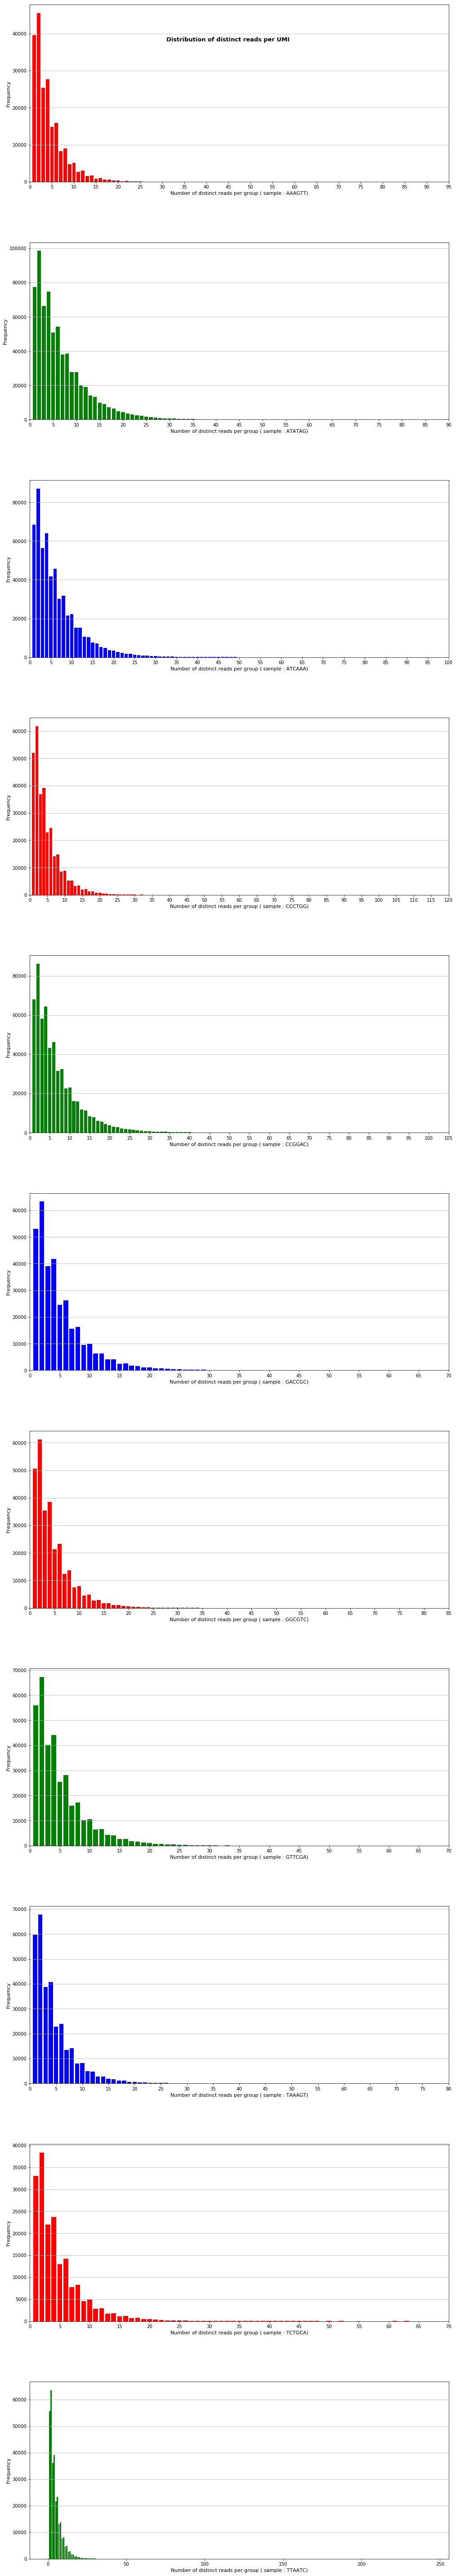

In [10]:
plot_bars(bar_plot_data)

In [11]:
plt.title('Distribution of distinct reads per UMI group of population (8, 10]', fontsize=15)
plt.xlabel('Number of distinct reads per group', fontsize=13)
plt.ylabel('Frequency',fontsize=13)

In [23]:
def plot_bars2(bar_plot_data):
    
    colors = cycle(['r','g','b'])
    
    fig = plt.figure(figsize=(10,80))
    fig.suptitle('Unique Molecular Identifier distribution per single cell', fontsize=13, fontweight='bold')

    number_of_subplots = len(bar_plot_data)

    plt.close('all')

    fig = plt.figure(figsize=(15,80))
    fig.suptitle('Distribution of distinct reads per UMI', fontsize=13, fontweight='bold')

    for i, sample in enumerate(bar_plot_data):
        sample, data1, data2 = bar_plot_data[i]
        i += 1
        #plt.ylim(0, 30000)
        plt.xlim(0, 50)
        plt.tight_layout(pad=4, w_pad=0.5, h_pad=10)
        plt.xticks(range(0,len(data1),5))
        ax = plt.subplot(number_of_subplots, 1, i)
        ax.yaxis.grid()
        ax.set_xlabel('Number of reads per group ( sample : ' + sample + ')', fontsize=11)
        ax.set_ylabel('Frequency', fontsize=11)
        ax.bar(data1, data2, width=0.8, color=next(colors), align='center')

    plt.savefig('umi_dist_all')

In [34]:
max(bar_plot_dupdata[0][2])

13278